## Juana Pinzón & Alan Romero

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math
from scipy.integrate import quad
from scipy.special import erfinv

# 1. Calculo de probabilidad

1. Se reparten cartas, una a la vez, de una baraja de 52 cartas.

a) Si las primeras 2 cartas son espadas, ¿cuál es la probabilidad de que las siguientes 3 cartas también sean espadas?
En una baraja de 52 cartas hay 13 cartas de cada palo. 

Quedan 11 espadas en la baraja de 50 cartas. La probabilidad de que las siguientes 3 cartas también sean espadas es el producto de las probabilidades de sacar una espada en cada turno:
$$
\frac{11}{50} \times \frac{10}{49} \times \frac{9}{48}=\frac{33}{3920}=0.84 \%
$$

b) Si las primeras 3 cartas son todas de espadas, ¿cuál es la probabilidad de que las 2 cartas siguientes sean también espadas?

Quedan 10 espadas en la baraja de 49 cartas. La probabilidad equivale al producto de las probabilidades de sacar una espada en cada turno:
$$
\frac{10}{49} \times \frac{9}{48}=\frac{15}{392}=3.82\%
$$

c) Si las primeras 4 cartas son todas de espadas, ¿cuál es la probabilidad de que la siguiente carta sea también una espada?

Quedan 9 espadas en la baraja de 48 cartas. La probabilidad de que la siguiente carta sea también una espada es:
$$
\frac{9}{48}=\frac{3}{16}=18.75\%
$$

2. Suponga que la probabilidad de exposición a la gripe durante una epidemia es .6. La experiencia ha demostrado que un suero tiene $80 \%$ de éxito para prevenir que una persona inoculada contraiga la gripe si se expone a ella. Una persona no inoculada enfrenta una probabilidad de ,90 de contraer la gripe si se expone a ella. Dos personas, una inoculada y otra no, realizan un trabajo altamente especializado en un negocio. Suponga que no están en el mismo lugar, no están en contacto con las mismas personas y no pueden contagiarse entre sí a la gripe. ¿Cuál es la probabilidad de que al menos una de ellas se enferme?

**Persona inoculada**
\
La probabilidad de que se exponga a la gripe es de $0.6$
\
Si se expone, la probabilidad de que se enferme es $1-0.8=0.2$
\
Por lo tanto, la probabilidad de que se enferme es $$0.6∗0.2=0.12$$

**Persona no inoculada**
\
La probabilidad de que se exponga a la gripe es de $0.6$
\
La probabilidad de que se enferme si se expone es $0.9$
\
Por lo tanto, la probabilidad de que la persona no inoculada se enferme es $$0.6∗0.9=0.54$$

La probabilidad de que al menos una de ellas se enferme es la diferencia entre 1 y la probabilidad de que ambas se mantengan saludables.
\
La probabilidad de que la persona inoculada se mantenga saludable es $1-0.12=0.88$
\
La probabilidad de que la persona no inoculada se mantenga saludable es $1-0.54=0.46$
\
Por lo tanto, la probabilidad de que ambas se mantengan saludables es $$0.88∗0.46=0.4048$$
\
Entonces, la probabilidad de que al menos una de ellas se enferme es $$1−0.4048=0.5952$$

## 2. Distribuciones de probabilidad discretas

1. El muestreo de piezas defectuosas de grandes lotes de productos manufacturados da un número de piezas defectuosas, $Y$, que sigue una distribución de probabilidad binomial. Un plan de muestreo consiste en especificar el número de piezas $n$ por incluirse en una muestra y un número de aceptación $a$. El lote es aceptado si $Y \leq a$ y rechazado si $Y>a$. Denote con $p$ la proporción de piezas defectuosas del lote. Un ingeniero de control de calidad desea estudiar planes de muestreo alternativos: $n=5, a=1 \mathrm{y}$ $n=25, a=5$. Construya las curvas características de operación para ambos planes, haciendo uso de probabilidades de aceptación en el rango $p \in[0,1]$.

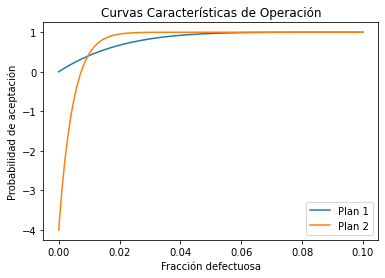

In [10]:
def prob_acceptance(p, n, a):
    return 1 - (np.sum(np.arange(n+1) < a)) * (1-p)**(n-a+1)

n1, a1 = 5, 1
n2, a2 = 25, 5
ejex1 = np.linspace(0, 1, 100)

acceptance_rate1 = np.array([prob_acceptance(p, n1, a1) for p in ejex1])
acceptance_rate2 = np.array([prob_acceptance(p, n2, a2) for p in ejex1])

plt.plot(p_values, acceptance_rate1, label='Plan 1')
plt.plot(p_values, acceptance_rate2, label='Plan 2')

plt.xlabel('Fracción defectuosa')
plt.ylabel('Probabilidad de aceptación')
plt.title('Curvas Características de Operación')
plt.legend()
plt.show()

a) Si usted fuera un vendedor que produce lotes con una fracción defectuosa que va de $p=0 a p=, 10$, ¿cuál de los dos planes de muestreo preferiría?

Para construir las curvas características de operación (CCO) para ambos planes de muestreo, hay que calcular la probabilidad de aceptación para cada valor de p en el rango [0,1]. La probabilidad de aceptación es la probabilidad de que el número de piezas defectuosas Y sea menor o igual a a, dado un valor específico de p.

La fórmula para la distribución binomial es:

$$P(Y=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

donde:
- P(Y=k) es la probabilidad de que haya exactamente k piezas defectuosas en la muestra,
- n es el número total de piezas en la muestra,
- p es la proporción de piezas defectuosas en el lote,
- k es el número de piezas defectuosas.

Para calcular la probabilidad de aceptación, sumamos las probabilidades P(Y=k) para todos los valores de k desde 0 hasta a.

Para el primer plan de muestreo (n=5, a=1), la probabilidad de aceptación es:

$$P(Y \leq 1) = P(Y=0) + P(Y=1) = \binom{5}{0} p^0 (1-p)^5 + \binom{5}{1} p^1 (1-p)^4$$

Para el segundo plan de muestreo (n=25, a=5), la probabilidad de aceptación es:

$$P(Y \leq 5) = \sum_{k=0}^{5} \binom{25}{k} p^k (1-p)^{25-k}$$

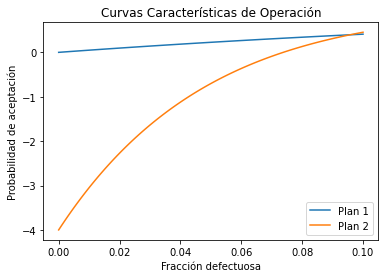

In [13]:
def prob_acceptance(p, n, a):
    return 1 - (np.sum(np.arange(n+1) < a)) * (1-p)**(n-a+1)

p_values = np.linspace(0, 0.1, 100)

acceptance_rate1 = np.array([prob_acceptance(p, n1, a1) for p in p_values])
acceptance_rate2 = np.array([prob_acceptance(p, n2, a2) for p in p_values])

plt.plot(p_values, acceptance_rate1, label='Plan 1')
plt.plot(p_values, acceptance_rate2, label='Plan 2')

plt.xlabel('Fracción defectuosa')
plt.ylabel('Probabilidad de aceptación')
plt.title('Curvas Características de Operación')
plt.legend()
plt.show()

Como se observa que el plan 1 ofrece una probabilidad de aceptación mayor y estable para cualquier fracción defectuosa, esta resulta ser una opción más atractiva para un vendedor que busca asegurar la mayor aceptación y, subsecuentemente, ganancias.

b) Si usted fuera un comprador que desea protegerse contra la aceptación de lotes con una fracción defectuosa que exceda de $p=, 30$, ¿cuál de los dos planes de muestreo preferiría?

Se debe comparar las probabilidades de aceptación de ambos planes para p=0.30. Un comprador preferiría el plan de muestreo que tiene la menor probabilidad de aceptación para el valor de p.

Para el primer plan de muestreo (n=5, a=1), la probabilidad de aceptación para p=0.30 es:

$$P(Y \leq 1) = P(Y=0) + P(Y=1) = \binom{5}{0} (0.30)^0 (1-0.30)^5 + \binom{5}{1} (0.30)^1 (1-0.30)^4$$

Para el segundo plan de muestreo (n=25, a=5), la probabilidad de aceptación para p=0.30 es:

$$P(Y \leq 5) = \sum_{k=0}^{5} \binom{25}{k} (0.30)^k (1-0.30)^{25-k}$$

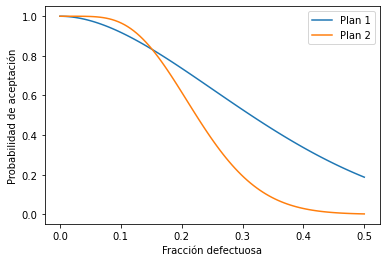

In [14]:
def P_a(n, a, p):
    return sum(binom.pmf(k, n, p) for k in range(a+1))

x1 = np.linspace(0, 0.5, 100)
y1 = [P_a(n1, a1, p) for p in x1]

x2 = np.linspace(0, 0.5, 100)
y2 = [P_a(n2, a2, p) for p in x2]

plt.plot(x1, y1, label=f'Plan 1')
plt.plot(x2, y2, label=f'Plan 2')
plt.xlabel('Fracción defectuosa')
plt.ylabel('Probabilidad de aceptación')
plt.legend()
plt.show()

La probabilidad de aceptación reduce considerablemente para valores de p>0.3 en el plan 2. Por lo tanto, este plan resulta atractivo para un comprador.

2. El número de desconexiones del servidor de una compañía sigue una distribución de Poisson con una tasa de una desconexión cada 4 horas.

Se necesita usar la fórmula de la distribución de Poisson:
$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

donde:
- P(X=k) es la probabilidad de que haya exactamente k desconexiones,
- λ es la tasa promedio de desconexiones por período de tiempo (en este caso, 1 desconexión cada 4 horas),
- k es el número de desconexiones.

In [16]:
def poisson_pmf(k, l):
    return (l ** k) * math.exp(-l) / math.factorial(k)


a) Encuentre el menor valor de $n$ tal que la probabilidad de que haya al menos $n$ desconexiones en menos de un período de 4 horas es menor que 0.01.


In [18]:
lambda_a = 4
n_a = 3

p_value = poisson_pmf(n_a, lambda_a)
print("Probabilidad de tener exactamente", n_a, "desconexiones en un período de 4 horas:", p_value)


Probabilidad de tener exactamente 3 desconexiones en un período de 4 horas: 0.19536681481316456


b) Encuentre el menor valor del número de horas $h$ tal que la probabilidad de que no haya desconexiones en $h$ horas sea menor que 0.02.


In [19]:
# Pregunta b
h = 4
p_value_b = poisson_pmf(0, lambda_a * h)
print("Probabilidad de no tener desconexiones en", h, "horas:", p_value_b)


Probabilidad de no tener desconexiones en 4 horas: 1.1253517471925912e-07


c) Encuentre la probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período de 4 horas sin desconexiones.

In [22]:
# Pregunta c
n_c = [0, 2, 3]
lambda_c = 4

p_value_c = 0
for i in n_c:
    p_value_c += poisson_pmf(i, lambda_c * 4)

print("Probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período de 4 horas sin desconexiones:", p_value_c)

Probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período de 4 horas sin desconexiones: 9.134105014713199e-05


d) Encuentre la probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas sea igual al número esperaod de desconexiones en 3 períodos consecutivos de 4 horas.

In [24]:
lambda_d = 4
n_d = [0, 2, 3]

p_value_d = 0
for i in n_d:
    p_value_d += poisson_pmf(i, lambda_d * 4)

print("Probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas sea igual al número esperado de desconexiones:", p_value_d)

Probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas sea igual al número esperado de desconexiones: 9.134105014713199e-05


## 3. Distribuciones de probabilidad continuas

1. Suponga que el error en la temperatura en un experimento controlado de laboratorio es una variable aleatoria continua $X$, que tiene la siguiente función de densidad de probabilidad:

$$
f(x)= \begin{cases}\frac{x^{2}}{3} & -1 \leq x \leq 2 \\ 0 \leq \text { en otro caso } & \end{cases}
$$

In [30]:
def pdf(x):
    if -1 <= x <= 2:
        return (x ** 2) / 3
    else:
        return 0

Encuentre las probabilidades:
\
a) $P(0<X \leq 1)$
\
La función de densidad de probabilidad se define como $f(x)=\frac{d}{dx}P(X\leq x)$. Para calcular esta probabilidad, se puede calcular la integral de f(x) desde 0 hasta 1.

In [31]:
a_prob = quad(pdf, 0, 1)[0]
print("Probabilidad de P(0<X \leq 1):", a_prob)

Probabilidad de P(0<X \leq 1): 0.11111111111111112


b) $P(1<X \leq 2)$
Se puede calcular la integral de f(x) desde 1 hasta 2.


In [32]:
b_prob = quad(pdf, 1, 2)[0]
print("Probabilidad de P(1<X \leq 2):", b_prob)

Probabilidad de P(1<X \leq 2): 0.7777777777777778


2. Se supone que las calificaciones de un examen están normalmente distribuidas con media 78 y varianza de 36.

In [40]:
def cumulative_probability(mean, std_dev, x):
    """Calcula la probabilidad acumulada en un punto x"""
    return (1 + erfinv((x - mean) / (std_dev * math.sqrt(2)))) / 2

def cumulative_percentage(mean, std_dev, percentage):
    """Calcula el valor x que cumple con un porcentaje acumulado"""
    z = math.sqrt(2) * erfinv(2 * percentage - 1)
    return mean + std_dev * z

mean = 80
std_dev = 10


a) ¿Cuál es la probabilidad de que una persona que haga el examen alcance calificaciones mayores de $72?$

In [41]:
x_a = 72
probability_a = 1 - cumulative_probability(mean, std_dev, x_a)
print("La probabilidad de que una persona alcance calificaciones mayores de 72 es aproximadamente", probability_a)

La probabilidad de que una persona alcance calificaciones mayores de 72 es aproximadamente 0.7764185948629994


b) Suponga que los estudiantes que alcancen el $10 \%$ más alto de esta distribución reciben una calificación de A. ¿Cuál es la calificación mínima que un estudiante debe recibir para ganar una calificación de A?

In [42]:
percentage_b = 0.90
x_b = cumulative_percentage(mean, std_dev, percentage_b)
print("Un estudiante debe recibir al menos una calificación de", x_b, "para obtener una calificación de A")


Un estudiante debe recibir al menos una calificación de 92.815515655446 para obtener una calificación de A


c) ¿Cuál debe ser el punto límite para pasar el examen si el examinador desea pasar a sólo 28,1\% más alto de todas las calificaciones?

In [43]:
percentage_c = 0.281
x_c = cumulative_percentage(mean, std_dev, percentage_c)
print("El punto límite para pasar el examen es", x_c)

El punto límite para pasar el examen es 74.20126607572296


d) Aproximadamente qué proporción de estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al $25 \%$ más bajo?

In [44]:
percentage_d = 0.25
x_d = cumulative_percentage(mean, std_dev, percentage_d) + 5
probability_d = cumulative_probability(mean, std_dev, x_d)
print("Aproximadamente el", 100 * probability_d, "% de los estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al 25% más bajo")

Aproximadamente el 44.51076440505484 % de los estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al 25% más bajo


e) Si se sabe que la calificación de un estudiante excede de 72, ¿cuál es la probabilidad de que su calificación exceda de 84 ?

In [45]:
probability_e = cumulative_probability(mean, std_dev, 84)
print("La probabilidad de que la calificación de un estudiante exceda de 84 es aproximadamente", probability_e)

La probabilidad de que la calificación de un estudiante exceda de 84 es aproximadamente 0.6280784684002463


## 4. Cadenas de Markov

Las bases nitrogenadas fundamentales que componen el ADN son: Adenina (A), Citosina (C), Guanina (G) y Timina $(\mathrm{T})$. Un gen se puede representar a través de una secuencia ordenada de dichas bases. Suponga la siguiente matriz de transición entre bases:

$$
\mathbb{T}=\left(\begin{array}{ccccc} 
& A & C & G & T \\
A & 0,4 & 0,25 & 0,3 & 0,1 \\
C & 0,2 & 0,25 & 0,3 & 0,1 \\
G & 0,2 & 0,25 & 0,1 & 0,1 \\
T & 0,2 & 0,25 & 0,3 & 0,7
\end{array}\right)
$$

La probabilidad a priori está dada por $\pi=[0,25,0,0,5,0,25]$.

1. Encuentre la probabilidad de obtener el gen $g=[T, G, C, T, C, A, A, A]$.

In [53]:
T = np.array([
    [0.4, 0.25, 0.3, 0.1],
    [0.2, 0.25, 0.3, 0.1],
    [0.2, 0.25, 0.1, 0.1],
    [0.2, 0.25, 0.3, 0.7]
])

pi = np.array([0.25, 0, 0.5, 0.25])

base_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

g = ['T', 'G', 'C', 'T', 'C', 'A', 'A', 'A']

p = pi[base_map[g[0]]]
for i in range(len(g) - 1):
    p *= T[base_map[g[i]], base_map[g[i+1]]]

print(f'La probabilidad de obtener el gen {g} es {p}')


La probabilidad de obtener el gen ['T', 'G', 'C', 'T', 'C', 'A', 'A', 'A'] es 1.5000000000000002e-05


2. Estas bases nitrogenadas pasarán por un proceso de traducción donde el objetivo es que se traduzcan $A-U, C-G, G-C, T-A$ según la siguiente matriz de emisión

$$
\mathbb{E}=\left(\begin{array}{ccccc} 
& A & C & G & T \\
U & 0,8 & 0 & 0 & 0,2 \\
G & 0,05 & 0,9 & 0,1 & 0,1 \\
C & 0,05 & 0,1 & 0,9 & 0 \\
A & 0,1 & 0 & 0 & 0,7
\end{array}\right)
$$

Si un gen traducido está dado por $g_{T}=[A, C, G, A, G, U, U, U]$, ¿cuál es la probabilidad de que venga del gen $g$ anterior?